# Базовый минимум
Вычисление углов матрицы на единичной сфере и визуализация. 

Матрица A
Вектор (b, c, d) = (0.333333333, 0.666666667, 0.666666667)
Проверка норимровки (условия унитарности) b^2+c^2+d^2 = 1.000000000000
Ортогональная проекция на плоскость (b, c) = (0.333333333, 0.666666667, 0)
Длина проекции r = sqrt(b^2 + c^2) = 0.745355992
theta (полярный угол) = arccos(d) = 0.841068671 rad = 48.189685°
phi (азимут) = atan2(c, b) = 1.107148718 rad = 63.434949°

Matrix M_A =
[[0.        +0.33333333j 0.66666667+0.66666667j]
 [0.66666667-0.66666667j 0.        -0.33333333j]]

Матрица B
Вектор (b, c, d) = (0.750000000, 0.333333333, 0.571304550)
Проверка норимровки (условия унитарности) b^2+c^2+d^2 = 1.000000000000
Ортогональная проекция на плоскость (b, c) = (0.750000000, 0.333333333, 0)
Длина проекции r = sqrt(b^2 + c^2) = 0.820738150
theta (полярный угол) = arccos(d) = 0.962701865 rad = 55.158754°
phi (азимут) = atan2(c, b) = 0.418224330 rad = 23.962489°

Matrix M_B =
[[0.        +0.75j       0.33333333+0.57130455j]
 [0.33333333-0.57130455j 0.        -0.75j      ]]

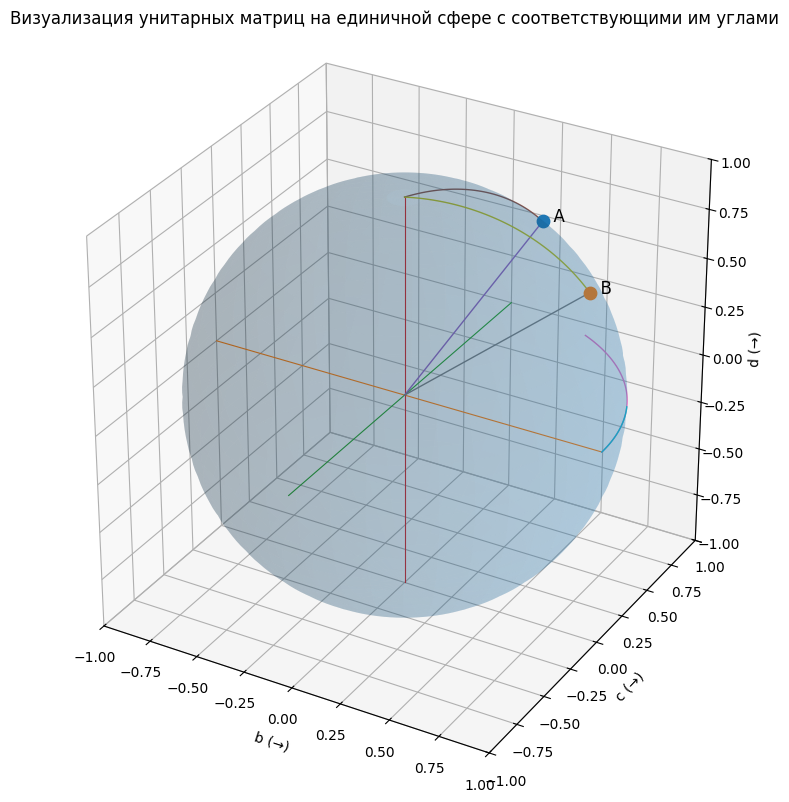

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def compute_angles(b, c, d, eps=1e-12):
    # Проверка нормировки
    norm = b * b + c * c + d * d
    if abs(norm - 1.0) > 1e-9:
        # Нормализуем входной вектор, чтобы защититься от округлений
        s = math.sqrt(norm)
        if s == 0:
            raise ValueError("Входной вектор нулевой.")
        b, c, d = b / s, c / s, d / s
        norm = 1.0

    r = math.hypot(b, c)  # sqrt(b^2 + c^2)
    # theta в [0, pi]
    theta = math.acos(max(-1.0, min(1.0, d)))
    # phi
    if r <= eps:
        phi = None
    else:
        phi = math.atan2(c, b)  # возвращает угол в (-pi, pi]
    return {
        "b": b, "c": c, "d": d,
        "norm": norm,
        "r": r,
        "theta": theta,
        "phi": phi,
        "theta_deg": math.degrees(theta),
        "phi_deg": None if phi is None else math.degrees(phi),
    }


def print_step_by_step(name, data):
    print(f"Матрица {name}")
    print(f"Вектор (b, c, d) = ({data['b']:.9f}, {data['c']:.9f}, {data['d']:.9f})")
    print(f"Проверка норимровки (условия унитарности) b^2+c^2+d^2 = {data['norm']:.12f}")
    print(f"Ортогональная проекция на плоскость (b, c) = ({data['b']:.9f}, {data['c']:.9f}, 0)")
    print(f"Длина проекции r = sqrt(b^2 + c^2) = {data['r']:.9f}")
    print(f"theta (полярный угол) = arccos(d) = {data['theta']:.9f} rad = {data['theta_deg']:.6f}°")
    if data['phi'] is None:
        print("phi (азимут) не определен (длина проекции r == 0) ")
    else:
        print(f"phi (азимут) = atan2(c, b) = {data['phi']:.9f} rad = {data['phi_deg']:.6f}°")
    print()


def build_unitary_matrix(a, b, c, d):
    return np.array([[a + 1j * b, c + 1j * d],
                     [c - 1j * d, a - 1j * b]], dtype=complex)


def plot_sphere_with_points(points):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_box_aspect((1, 1, 1))

    u = np.linspace(0, 2 * np.pi, 120)
    v = np.linspace(0, np.pi, 80)
    U, V = np.meshgrid(u, v)
    X = np.cos(U) * np.sin(V)
    Y = np.sin(U) * np.sin(V)
    Z = np.cos(V)
    ax.plot_surface(X, Y, Z, linewidth=0, antialiased=True, alpha=0.18)

    ax.plot([-1, 1], [0, 0], [0, 0], linewidth=0.8)
    ax.plot([0, 0], [-1, 1], [0, 0], linewidth=0.8)
    ax.plot([0, 0], [0, 0], [-1, 1], linewidth=0.8)

    for p in points:
        b, c, d = p['b'], p['c'], p['d']
        name = p['name']
        ax.scatter([b], [c], [d], s=80)
        ax.text(b, c, d, f"  {name}", fontsize=12)

        ax.plot([0, b], [0, c], [0, d], linewidth=1)

        if p['phi'] is not None:
            t = np.linspace(0, p['theta'], 80)
            mer_b = np.sin(t) * np.cos(p['phi'])
            mer_c = np.sin(t) * np.sin(p['phi'])
            mer_d = np.cos(t)
            ax.plot(mer_b, mer_c, mer_d, linewidth=1)

            t2 = np.linspace(0, p['phi'], 60)
            az_b = np.cos(t2)
            az_c = np.sin(t2)
            az_d = np.zeros_like(t2)
            ax.plot(az_b, az_c, az_d, linewidth=1)
        else:
            # если phi не определён, можно показать только линию от полюса вдоль оси d
            if abs(d - 1.0) < 1e-9:
                ax.plot([0, 0], [0, 0], [1, 0], linewidth=1)
            elif abs(d + 1.0) < 1e-9:
                ax.plot([0, 0], [0, 0], [-1, 0], linewidth=1)

    ax.set_xlabel('b (→)')
    ax.set_ylabel('c (→)')
    ax.set_zlabel('d (→)')
    ax.set_title("Визуализация унитарных матриц на единичной сфере с соответствующими им углами")
    ax.set_xlim([-1, 1]);
    ax.set_ylim([-1, 1]);
    ax.set_zlim([-1, 1])
    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    examples = [
        {"name": "A", "a": 0.0, "b": 1/3, "c": 2/3, "d": 2/3},
        {"name": "B", "a": 0.0, "b": 3/4, "c": 1/3, "d": math.sqrt(47)/12}
    ]

    prepared_points = []
    for ex in examples:
        a = ex["a"];
        b = ex["b"];
        c = ex["c"];
        d = ex["d"]
        data = compute_angles(b, c, d)
        print_step_by_step(ex['name'], data)
        M = build_unitary_matrix(a, b, c, d)
        print(f"Matrix M_{ex['name']} =\n{M}\n")
        prepared_points.append({
            "name": ex['name'],
            "b": data['b'],
            "c": data['c'],
            "d": data['d'],
            "theta": data['theta'],
            "phi": data['phi']
        })

    plot_sphere_with_points(prepared_points)

## результаты:

In [ ]:
:\Mathem_model\Attempt\Scripts\python.exe D:\Mathem_model\L1.py 
Матрица A
Вектор (b, c, d) = (0.333333333, 0.666666667, 0.666666667)
Проверка норимровки (условия унитарности) b^2+c^2+d^2 = 1.000000000000
Ортогональная проекция на плоскость (b, c) = (0.333333333, 0.666666667, 0)
Длина проекции r = sqrt(b^2 + c^2) = 0.745355992
theta (полярный угол) = arccos(d) = 0.841068671 rad = 48.189685°
phi (азимут) = atan2(c, b) = 1.107148718 rad = 63.434949°

Matrix M_A =
[[0.        +0.33333333j 0.66666667+0.66666667j]
 [0.66666667-0.66666667j 0.        -0.33333333j]]

Матрица B
Вектор (b, c, d) = (0.750000000, 0.333333333, 0.571304550)
Проверка норимровки (условия унитарности) b^2+c^2+d^2 = 1.000000000000
Ортогональная проекция на плоскость (b, c) = (0.750000000, 0.333333333, 0)
Длина проекции r = sqrt(b^2 + c^2) = 0.820738150
theta (полярный угол) = arccos(d) = 0.962701865 rad = 55.158754°
phi (азимут) = atan2(c, b) = 0.418224330 rad = 23.962489°

Matrix M_B =
[[0.        +0.75j       0.33333333+0.57130455j]
 [0.33333333-0.57130455j 0.        -0.75j      ]]

 ![title](https://raw.githubusercontent.com/Udav6/Mathem_model_2025/main/Fig_L1_1.png)

# Роскошный максимум. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Заданные фиксированные параметры
b2, c2, d2 = 0.5, 0.3, np.sqrt(0.66)

# Сетка для b1 и c1
n = 201
b1_vals = np.linspace(-1.0, 1.0, n)
c1_vals = np.linspace(-1.0, 1.0, n)
B1, C1 = np.meshgrid(b1_vals, c1_vals)

R2 = B1**2 + C1**2
mask = R2 <= 1.0  # допустимы только точки внутри единичного круга


alpha_pos = np.full_like(B1, np.nan, dtype=float)
alpha_neg = np.full_like(B1, np.nan, dtype=float)

# Вычисление d1 и alpha
d1 = np.sqrt(np.clip(1.0 - R2, 0.0, 1.0))
alpha_pos[mask] = B1[mask]*b2 + C1[mask]*c2 + d1[mask]*d2
alpha_neg[mask] = B1[mask]*b2 + C1[mask]*c2 - d1[mask]*d2

# Некоторые числовые выводы
print("v2 =", (b2, c2, d2))
print("alpha_pos range: [{:.6f}, {:.6f}]".format(np.nanmin(alpha_pos), np.nanmax(alpha_pos)))
print("alpha_neg range: [{:.6f}, {:.6f}]".format(np.nanmin(alpha_neg), np.nanmax(alpha_neg)))


from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.set_title("alpha(b1,c1) с d1 = +sqrt(1 - b1^2 - c1^2) (верхняя ветвь)")
surf1 = ax1.plot_surface(B1, C1, alpha_pos, rstride=3, cstride=3, linewidth=0, antialiased=True, cmap='viridis', alpha=0.9)
ax1.set_xlabel('b1'); ax1.set_ylabel('c1'); ax1.set_zlabel('alpha')
fig.colorbar(surf1, ax=ax1, shrink=0.6)

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.set_title("alpha(b1,c1) с d1 = -sqrt(1 - b1^2 - c1^2) (нижняя ветвь)")
surf2 = ax2.plot_surface(B1, C1, alpha_neg, rstride=3, cstride=3, linewidth=0, antialiased=True, cmap='plasma', alpha=0.9)
ax2.set_xlabel('b1'); ax2.set_ylabel('c1'); ax2.set_zlabel('alpha')
fig.colorbar(surf2, ax=ax2, shrink=0.6)

plt.tight_layout()
plt.show()

## результаты:

![image2](https://raw.githubusercontent.com/Udav6/Mathem_model_2025/main/Fig_L1_2.png)

# Гран-при

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Необходимо для 3D

# Фиксируем B
b2, c2, d2 = 1/9, 4/9, 8/9  # пример, норма = 1
assert np.isclose(b2**2 + c2**2 + d2**2, 1.0), "Норма B не равна 1"

# Сетка для b1, c1
b1_vals = np.linspace(-1, 1, 200)
c1_vals = np.linspace(-1, 1, 200)
B1, C1 = np.meshgrid(b1_vals, c1_vals)
Sigma = np.zeros_like(B1)

# Вычисляем sigma
for i in range(B1.shape[0]):
    for j in range(B1.shape[1]):
        b1 = B1[i, j]
        c1 = C1[i, j]
        if b1**2 + c1**2 > 1:
            Sigma[i, j] = np.nan  # d1 не существует
        else:
            d1 = np.sqrt(1 - b1**2 - c1**2)
            # b3, c3, d3
            b3 = c1*d2 - d1*c2
            c3 = d1*b2 - b1*d2
            d3 = b1*c2 - c1*b2
            Sigma[i, j] = b3**2 + c3**2 + d3**2

print(f' Максимальное значение сигма: {np.nanmax(Sigma)}')

# Строим 3D поверхность
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# Поверхность
surf = ax.plot_surface(B1, C1, Sigma, cmap='viridis', edgecolor='none', alpha=0.9)

# Настройки осей
ax.set_xlabel(r'$b_1$')
ax.set_ylabel(r'$c_1$')
ax.set_zlabel(r'$\sigma(b_1, c_1)$')
ax.set_title(r'3D визуализация $\sigma(b_1, c_1) = b_3^2 + c_3^2 + d_3^2$')

# Цветовая шкала
fig.colorbar(surf, shrink=0.6, aspect=10, label=r'$\sigma$')

plt.show()

## результаты:

In [ ]:
Максимальное значение сигма: 0.9999999996478676

![image3](https://raw.githubusercontent.com/Udav6/Mathem_model_2025/main/Fig_L1_3.png)